In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def generate_folder(path):
	if not os.path.exists(path):
		os.makedirs(path)

	return path

In [3]:
def load_data(num_samples = 1000): #Exemple de generation de données touvé sur internet

	x1 = np.random.multivariate_normal( [1,1], [[1,-0.3],[-0.3,2]], num_samples  )
	x2 = np.random.multivariate_normal( [7,7], [[1,-0.3],[-0.3,2]], num_samples )
	y1 = np.ones([num_samples]) *-1
	y2 = np.ones([num_samples]) *1
	x = np.concatenate([x1,x2], axis =0)
	y = np.concatenate([y1,y2], axis =0)

	# Add outliers.
	x_outlier = np.array([[8,8]])
	y_outlier = np.array([-1])
	x = np.concatenate([x,x_outlier ], axis =0)
	y = np.concatenate([y,y_outlier ], axis =0)

	return x, y

In [4]:
def plot_results( x,y, w=None, b=None, title = "", img_save_path = None , show_img = True ):

	x_negative_1 =[]
	x_positive_1 =[]
	for ind in range(x.shape[0]):
		if y[ind] == -1:
			x_negative_1.append( x[ind] )
		else:
			x_positive_1.append( x[ind] ) 
	x_negative_1 = np.asarray(x_negative_1)
	x_positive_1 = np.asarray(x_positive_1) 

	plt.plot(x_negative_1[:,0], x_negative_1[:,1], "o", markerfacecolor='none')
	plt.plot(x_positive_1[:,0], x_positive_1[:,1], 's', markerfacecolor='none')

	if w is not None and b is not None:
		if w[1] != 0:
			## a1 a2 represent the first and second dimensions
			a1 = np.linspace( min(x[:,0]), max(x[:,0]), 1000 )
			a2 = -w[0]/w[1]*a1-b/w[1]
			a2_up_margin = -w[0]/w[1]*a1-b/w[1]+1/w[1]
			a2_down_margin = -w[0]/w[1]*a1-b/w[1]-1/w[1]
			plt.plot(a1,a2,"r-")
			plt.plot(a1,a2_up_margin, "r--")
			plt.plot(a1,a2_down_margin, "r--")
		else:
			a2 = np.linspace( min(x[:,1]), max(x[:,1]), 1000 )
			a1 = -w[1]/w[0]*a2-b/w[0]
			a1_up_margin = -w[1]/w[0]*a2-b/w[0] + 1/w[0]
			a1_down_margin = -w[1]/w[0]*a2-b/w[0] - 1/w[0]
			plt.plot(a1,a2,"r-")
			plt.plot(a1_up_margin, a2, "r--")
			plt.plot(a1_down_margin, a2, "r--")

	plt.xlabel("x")
	plt.ylabel("y")
	plt.xlim([min(x[:,0])-0.5, max(x[:,0])+0.5 ])
	plt.ylim([min(x[:,1])-0.5, max(x[:,1])+0.5 ])
	plt.legend(["y=-1","y=+1"])
	plt.title(title)
	if img_save_path is not None:
		plt.savefig( img_save_path )
	if show_img:
		plt.show()

In [5]:
## input the (x,y) of training dataset, output the hyperplane parameters w and b
def svm(x,y, max_iter = 100000, lr = 0.1, batch_size = 100, mylambda = 0.0001, plot_training_results = False ):
	# initialize w and b
	x_dim = x.shape[-1]
	w = np.random.normal(size=x_dim)
	b = np.random.normal()
	current_iter = 0
	# start training
	while True:
		batch_index = np.random.choice(x.shape[0], size=batch_size, replace = False )
		x_batch, y_batch = x[batch_index], y[batch_index]

		# define the loss function:
		loss1 = mylambda /2 * np.linalg.norm( w )**2
		loss2 = np.mean( np.maximum(1- y_batch*(np.matmul( x_batch,w )+b), 0) )
		loss = loss1 + loss2 
  
		dLdw = mylambda * w -  np.mean(np.expand_dims(((1 - y_batch*(np.matmul(x_batch, w) + b)) >0) * y_batch, axis =-1) * x_batch,
                               axis = 0, keepdims = False)
		dLdb = - np.mean(((1 - y_batch*(np.matmul(x_batch,w ) + b))> 0)*y_batch, axis =0, keepdims = False)

		w -= lr * dLdw
		b -= lr * dLdb

		current_iter+=1
		if current_iter % 4000 == 0:
			print("regularization loss: %f, hinge loss: %f, totoal loss: %f"%( loss1,loss2, loss ))
			if plot_training_results:
				plot_results(x,y, w,b, title= "iteration %d"%(current_iter), img_save_path=generate_folder("results/gd-svm/")+"results-iter%d.jpg"%(current_iter), show_img=False )
		
		if current_iter >= max_iter:
			break
	return w,b

regularization loss: 0.000164, hinge loss: 0.003760, totoal loss: 0.003924
regularization loss: 0.000180, hinge loss: 0.000000, totoal loss: 0.000180
regularization loss: 0.000159, hinge loss: 0.000112, totoal loss: 0.000271
regularization loss: 0.000182, hinge loss: 0.045913, totoal loss: 0.046096
regularization loss: 0.000180, hinge loss: 0.000000, totoal loss: 0.000180
regularization loss: 0.000179, hinge loss: 0.000000, totoal loss: 0.000179
regularization loss: 0.000180, hinge loss: 0.000000, totoal loss: 0.000180
regularization loss: 0.000181, hinge loss: 0.000000, totoal loss: 0.000181
regularization loss: 0.000176, hinge loss: 0.003889, totoal loss: 0.004065
regularization loss: 0.000187, hinge loss: 0.004233, totoal loss: 0.004420
regularization loss: 0.000178, hinge loss: 0.000000, totoal loss: 0.000178
regularization loss: 0.000175, hinge loss: 0.045912, totoal loss: 0.046087
regularization loss: 0.000191, hinge loss: 0.000000, totoal loss: 0.000191
regularization loss: 0.00

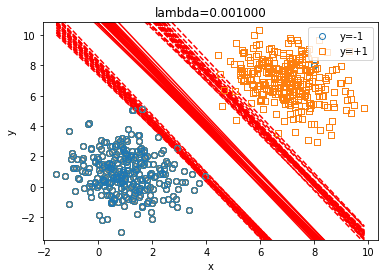

In [6]:
np.random.seed(1001)
x, y = load_data(300)
np.random.seed()
mylambda = 0.001

w,b = svm(x,y, mylambda = mylambda, plot_training_results = True, max_iter=100000)
plot_results(x,y, w,b, title = "lambda=%f"%(mylambda) )